# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Русинов Дмитрий, вариант 31.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши:

Система ОДУ первого порядка:
\begin{cases}
    y'_1 = f(x, y_1, ..., y_n) \\
    ... \\
    y'_n = f(x, y_1, ..., y_n) \\
    y_1(a) = y_{1a} \\
    ... \\
    y_n(a) = y_{na}
\end{cases}\,.

Решение заключается в поиске интеграла, который удовлетворяет начальным условиям.

### Краевая задача:

Задача, решение которой заключается в поиске интеграла дифференциального уравнения такого, что значение интеграла на краях отрезка удовлетворяет условию.

### Метод половинного деления:

Алгоритм, который позволяет найти корень функции. Суть алгоритма заключается в сужении области, где находится корень. Определение, есть ли в области корень происходит за счет сравнения знаков значения функции на концах области: если знаки разные, значит корень существует.

## Постановка задачи

Дано дифференциальное уравнение: $y'' = f(x, y), a < x < b$ (1) и граничные условия.

$y(a) = y_a, y(b) = y_b$ (2)

Требуется найти решение задачи (1)-(2) и построить его график. Рассмотрим задачу Коши для уравнения (1) с начальными условиями.

$y(a) = y_a, y'(a) = h$ (3)

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при $x = b$ является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$ (4)

Это уравнение с одним неизвестным h.
Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы

In [15]:
import typing

import matplotlib.pyplot
import numpy as np
import math


def func(x: float, y: float):
    return math.cos(x * y)


class SecondOrderODE:
    def __init__(self, a: float, b: float, y_a: float, f: typing.Callable):

        self._a = a
        self._b = b
        self._y_a = y_a
        self._f = f

    def solution(self, h: float, step: float) -> typing.Tuple[list, list]:
        x = self._a
        y = self._y_a
        g = h

        gPoints = []
        yPoints = []

        while x < self._b:

            gPoints.append(g)
            yPoints.append(y)

            k1 = self._f(x, y)
            k2 = self._f(x + step / 2, y + step / 2 * k1)
            k3 = self._f(x + step / 2, y + step / 2 * k2)
            k4 = self._f(x + step, y + step * k3)

            y += g * step
            g += step / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

            x += step

        return gPoints, yPoints


class BisectionMethod:
    def __init__(self, ode: SecondOrderODE, h: float, delta: float, epsilon: float):
        self._ode = ode
        self._h = h
        self._delta = delta
        self._epsilon = epsilon

    def solution(self, theoryValue: float):

        h = self._h
        delta = self._delta
        step = 1 / 100
        _, yPoints = self._ode.solution(h, step)
        y = yPoints[-1]
        print("h\t\ty\t\tdelta")
        while abs(y - theoryValue) > self._epsilon:

            print("{:4f}\t {:4f}\t {:4f}".format(h, y, delta))

            left = h - delta
            right = h + delta

            _, yPoints = self._ode.solution(left, step)
            leftY = yPoints[-1]

            _, yPoints = self._ode.solution(right, step)
            rightY = yPoints[-1]

            if (leftY - theoryValue) * (y - theoryValue) < 0:
                h = left + delta / 2
            elif (rightY - theoryValue) * (y - theoryValue) < 0:
                h = right - delta / 2
            else:
                raise ValueError("There is not solution")

            delta /= 2
            _, yPoints = self._ode.solution(h, step)
            y = yPoints[-1]

        print("{:4f}\t {:4f}\t {:4f}".format(h, y, delta))
        return h

print("Результат работы половинного метода")
instance = SecondOrderODE(a=0, b=2, y_a=5, f=func)
bm = BisectionMethod(ode=instance, h=1, delta=10, epsilon=0.001)
result = bm.solution(theoryValue=1)


Результат работы половинного метода
h		y		delta
1.000000	 7.056099	 10.000000
-4.000000	 -2.211972	 5.000000
-1.500000	 1.403836	 2.500000
-2.750000	 -0.525263	 1.250000
-2.125000	 0.245246	 0.625000
-1.812500	 0.747014	 0.312500
-1.656250	 1.052872	 0.156250
-1.734375	 0.894595	 0.078125
-1.695312	 0.972349	 0.039062
-1.675781	 1.012259	 0.019531
-1.685547	 0.992217	 0.009766
-1.680664	 1.002216	 0.004883
-1.683105	 0.997211	 0.002441
-1.681885	 0.999712	 0.001221


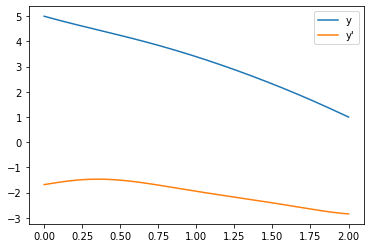

In [14]:
gPoints, yPoints = instance.solution(result, 1 / 100)
xPoints = np.linspace(0, 2, 200)
matplotlib.pyplot.plot(xPoints, yPoints, label="y")
matplotlib.pyplot.plot(xPoints, gPoints, label="y'")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

## Выводы

Была решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши. Задача Коши решалась численным интегрированием, а краевая задача с использованием метода половинного деления для поиска начального состояния уравнения.